# 1- Importation des données:

In [39]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
warnings.filterwarnings("ignore")

In [187]:
#fonction pour le calcul de la distance basée sur la latitude et longitude 
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
#fonction q'on va utiliser pour créer une colonne distance
def f(x):
    return distance(x[0],x[2],x[1],x[3])

print('distance entre Padua et Barcelone calculée à partir de la longitude et latitude :',distance(45.406435,41.385064,11.876761,2.173404))
print('distance définie par google: 901.87 km')

distance entre Padua et Barcelone calculée à partir de la longitude et latitude : 901.6572426075505
distance définie par google: 901.87 km


In [41]:
data=pd.read_csv('ticket_data.csv')
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74168 entries, 0 to 74167
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               74168 non-null  int64  
 1   company          74168 non-null  int64  
 2   o_station        32727 non-null  float64
 3   d_station        32727 non-null  float64
 4   departure_ts     74168 non-null  object 
 5   arrival_ts       74168 non-null  object 
 6   price_in_cents   74168 non-null  int64  
 7   search_ts        74168 non-null  object 
 8   middle_stations  32727 non-null  object 
 9   other_companies  32727 non-null  object 
 10  o_city           74168 non-null  int64  
 11  d_city           74168 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 6.8+ MB


In [188]:
cities=pd.read_csv('cities.csv')
print( 'nombre de données manquantes par colonne:',cities.isnull().sum())
cities

nombre de données manquantes par colonne: id                0
local_name        0
unique_name       1
latitude          0
longitude         0
population     7671
dtype: int64


,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.41,11.88,209678.00
1,76,"Barcelona, Cataluña, España",barcelona,41.39,2.17,1611822.00
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.59,7.62,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.59,11.01,105412.00
4,11979,"Balș, Olt, România",balș,44.35,24.10,NaN
...,...,...,...,...,...,...
8035,9964,"Saint-André-lez-Lille, Hauts-de-France, France",saint-andre-lez-lille,50.65,3.05,NaN
8036,10863,"Kiev, Шевченківський район, Ukraine",kiev,50.45,30.52,NaN
8037,11144,"Brighton, England, UK",brighton,50.82,-0.14,NaN
8038,11377,"Manises, Comunitat Valenciana, España",manises,39.49,-0.46,NaN


In [191]:
stations=pd.read_csv('stations.csv')
print('nombre de données manquantes par colonne:',(stations.isnull().sum()))
stations

nombre de données manquantes par colonne: id             0
unique_name    0
latitude       0
longitude      0
dtype: int64


,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.84,10.09
1,2,Aéroport Bordeaux-Mérignac,44.83,-0.70
2,3,Aéroport CDG,49.01,2.56
3,4,Aéroport de Berlin-Schönefeld,52.39,13.52
4,5,Aéroport de Dresden,51.12,13.76
...,...,...,...,...
11030,11032,Porto Avda De Los Aliados,41.15,-8.61
11031,11033,Rom Ciampino Flughafen Piazzale Leonardo da Vinci,41.80,12.60
11032,11034,Sants,41.38,2.14
11033,11035,Vozilici D66,45.16,14.16


In [192]:
providers=pd.read_csv('providers.csv')
# on a changé le nom de la colonne pour faciliter la jointure avec les données des historiques des tickets
providers=providers.rename({'id':'company'}, axis=1) 
print('nombre de données manquantes par colonne:',providers.isnull().sum())
providers

nombre de données manquantes par colonne: company                  0
company_id               0
provider_id             14
name                     0
fullname                 0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64


,company,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
...,...,...,...,...,...,...,...,...,...,...
222,8384,10,16,thalys,Thalys,True,True,False,True,train
223,8385,11,NaN,bbc,Blablacar,False,False,False,False,carpooling
224,8387,30,NaN,vatry,Vatry,NaN,NaN,NaN,NaN,bus
225,8388,40,NaN,beauval,Beauval,NaN,NaN,NaN,NaN,bus


### Préparation des données :

In [51]:
# ticket est le nom du tableau qu'on va analyser
ticket=data.copy()
#ajout de la colonne du type de transport issu du tableau providers:
ticket=pd.merge(ticket,providers[['company','transport_type']], how='left',on=['company'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

#changement du nom de la colonne concenant le prix
ticket=ticket.rename({'price_in_cents':'price'}, axis=1)

#prépation des colonnes concernant le temps d'arrivée et de départ en laissant que le temps
ticket['departure_ts']=ticket['departure_ts'].apply(lambda x: x.split('+')[0])
ticket['arrival_ts']=ticket['arrival_ts'].apply(lambda x: x.split('+')[0])

#changement le type des colonnes en temps:
ticket['departure_ts']=pd.to_datetime(ticket['departure_ts'], infer_datetime_format=True)
ticket['arrival_ts']=pd.to_datetime(ticket['arrival_ts'], infer_datetime_format=True)

#création de la colonne durée des trajets
ticket['durée']=ticket['arrival_ts']-ticket['departure_ts']
#durée en heure et minute
ticket['durée ']=ticket['durée'].apply(lambda x:divmod(x.seconds/60,60 ))
#durée en minutes
ticket['durée min']=ticket['durée'].apply(lambda x:x.seconds/60)

#ajout de la colonne distance à partir des latitudes et longitudes des villes de déprt et d'arrivée
ticket=pd.merge(ticket,cities[['id','latitude','longitude']], how='left',right_on=['id'],left_on=['o_city'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
ticket=ticket.rename({'latitude':'o_latitude','longitude':'o_longitude' }, axis=1)
ticket=pd.merge(ticket,cities[['id','latitude','longitude']], how='left',right_on=['id'],left_on=['d_city'],suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
ticket=ticket.rename({'latitude':'d_latitude','longitude':'d_longitude' }, axis=1)
ticket['distance']=ticket[['o_latitude','o_longitude','d_latitude','d_longitude']].apply( f, axis=1)

#création de la colonne distance cat qui représente la catégorie des trajets: ['0-200', '200-800', '800-2000']
ticket['dist cat']=pd.cut(ticket['distance'], bins=[0, 200, 800, 2000], include_lowest=True, labels=['0-200', '200-800', '800-2000'])
ticket.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price,search_ts,middle_stations,other_companies,...,transport_type,durée,durée,durée min,o_latitude,o_longitude,d_latitude,d_longitude,distance,dist cat
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,...,carpooling,0 days 06:10:00,"(6.0, 10.0)",370.0,47.907018,1.90627,43.604452,3.918318,503.197167,200-800
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},...,bus,0 days 17:50:00,"(17.0, 50.0)",1070.0,47.907018,1.90627,43.604452,3.918318,503.197167,200-800
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",...,train,1 days 07:57:00,"(7.0, 57.0)",477.0,47.907018,1.90627,43.604452,3.918318,503.197167,200-800
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",...,train,0 days 21:35:00,"(21.0, 35.0)",1295.0,47.907018,1.90627,43.604452,3.918318,503.197167,200-800
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},...,train,0 days 21:46:00,"(21.0, 46.0)",1306.0,47.907018,1.90627,43.604452,3.918318,503.197167,200-800


Suppresion de différentes colonnes pour conserver que les colonnes qu'on va analyser durant ce projet

In [52]:
ticket=ticket.drop(columns=['durée','durée','search_ts','middle_stations','other_companies','o_station','d_station','o_latitude','o_longitude','d_latitude','d_longitude'])
ticket=ticket.drop(ticket.columns[8], axis=1)

,id,company,departure_ts,arrival_ts,price,o_city,d_city,transport_type,durée min,distance,dist cat
0,6795025,8385,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,611,542,carpooling,370.0,503.197167,200-800
1,6795026,9,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,611,542,bus,1070.0,503.197167,200-800
2,6795027,8377,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,611,542,train,477.0,503.197167,200-800
3,6795028,8377,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,611,542,train,1295.0,503.197167,200-800
4,6795029,8381,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,611,542,train,1306.0,503.197167,200-800
...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,2017-10-27 02:30:00,2017-10-27 16:00:00,2590,628,562,bus,810.0,338.320135,200-800
74164,6869185,9,2017-10-27 07:00:00,2017-10-27 13:30:00,2700,628,562,bus,390.0,338.320135,200-800
74165,6869187,8371,2017-10-27 08:30:00,2017-10-27 15:15:00,3000,628,562,bus,405.0,338.320135,200-800
74166,6869189,13,2017-10-27 13:25:00,2017-10-27 21:10:00,2880,628,562,bus,465.0,338.320135,200-800


### tableau final:

In [193]:
ticket

,id,company,departure_ts,arrival_ts,price,o_city,d_city,transport_type,durée min,distance,dist cat
0,6795025,8385,2017-10-13 14:00:00,2017-10-13 20:10:00,4550,611,542,carpooling,370.00,503.20,200-800
1,6795026,9,2017-10-13 13:05:00,2017-10-14 06:55:00,1450,611,542,bus,1070.00,503.20,200-800
2,6795027,8377,2017-10-13 13:27:00,2017-10-14 21:24:00,7400,611,542,train,477.00,503.20,200-800
3,6795028,8377,2017-10-13 13:27:00,2017-10-14 11:02:00,13500,611,542,train,1295.00,503.20,200-800
4,6795029,8381,2017-10-13 21:46:00,2017-10-14 19:32:00,7710,611,542,train,1306.00,503.20,200-800
...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,2017-10-27 02:30:00,2017-10-27 16:00:00,2590,628,562,bus,810.00,338.32,200-800
74164,6869185,9,2017-10-27 07:00:00,2017-10-27 13:30:00,2700,628,562,bus,390.00,338.32,200-800
74165,6869187,8371,2017-10-27 08:30:00,2017-10-27 15:15:00,3000,628,562,bus,405.00,338.32,200-800
74166,6869189,13,2017-10-27 13:25:00,2017-10-27 21:10:00,2880,628,562,bus,465.00,338.32,200-800


In [53]:
print(ticket.isnull().sum())

id                0
company           0
departure_ts      0
arrival_ts        0
price             0
o_city            0
d_city            0
transport_type    0
durée min         0
distance          0
dist cat          0
dtype: int64


On voit que toutes les colonnes sont complètes sans données manquantes.

# 2- Data analysis:

## a- Univariate analysis:

####  Prix des trajets :

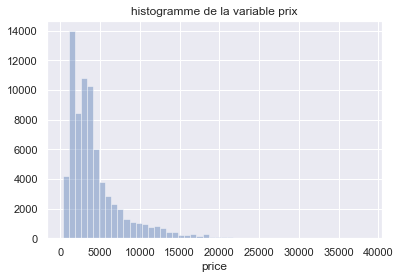

In [93]:
sns.distplot(ticket['price'],kde = False)
plt.title('histogramme de la variable prix')
plt.show()

count    74168.000000
mean      4382.711061
std       3739.325367
min        300.000000
25%       1900.000000
50%       3350.000000
75%       5250.000000
max      38550.000000
Name: price, dtype: float64


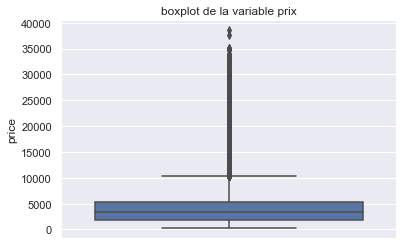

In [94]:
sns.set(style="darkgrid")
box_plot=sns.boxplot(y=ticket['price'])
print(ticket['price'].describe())
box_plot
plt.title('boxplot de la variable prix')
plt.show()

On peut constater la présence de plusieurs valeurs abérentes  au dessus du prix 10000 et qu'il faudrait individuellement les analyser pour détéerminer les causes de ces écarts

Le boxplot est aplati ce qui montre que les données ne varient pas beaucoup et 75% données sont compris entre 300 et 5250.

#### Durées des trajets en minutes:

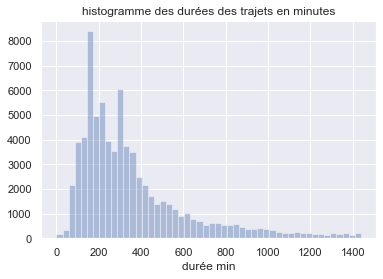

In [96]:
sns.distplot(ticket['durée min'],kde = False)
plt.title('histogramme des durées des trajets en minutes')
plt.show()

count    74168.000000
mean       360.918927
std        270.011908
min          0.000000
25%        170.000000
50%        289.000000
75%        445.000000
max       1438.000000
Name: durée min, dtype: float64


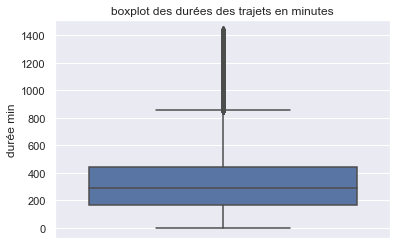

In [83]:
sns.set(style="darkgrid")
box_plot=sns.boxplot(y=ticket['durée min'])
print(ticket['durée min'].describe())
box_plot
plt.title('boxplot des durées des trajets en minutes')
plt.show()

### Variables qualitatives:

#### Destinations les plus populaires:

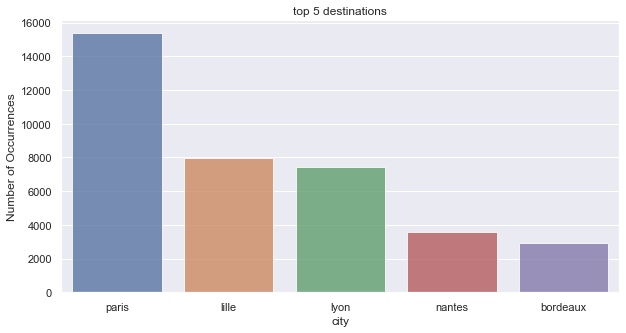

In [204]:
d_city= ticket['d_city'].value_counts()
city_count = d_city[:5,]
city_count=city_count.rename(lambda x: cities[cities['id']==x].iloc[0,2])
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8)
plt.title('top 5 destinations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('city', fontsize=12)
plt.show()

la majorité des trajets sont vers Paris et les grandes villes qui sont à proximité.

On peut continuer l'analyse en complétant la variable population présente dans le tableau cities pour voir la corrélation entre les 2 variables destination et population.

#### types de transport:

In [231]:
#ajouter les pourcentages des fréquences dans un barplot selon si on utilise 1 ou 2  variables catégorielles:
#2 variables (plots with hue option):
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
            
#1 variable:
def without_hue(plot, feature):
    total = len(feature)
    for ax in plot.axes.ravel():
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

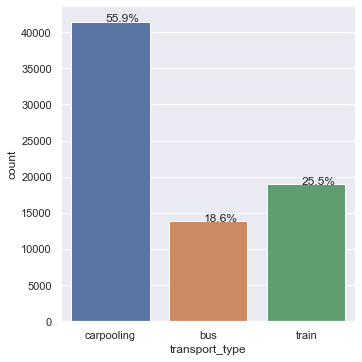

In [199]:
ax=sns.factorplot('transport_type',data=ticket,kind='count')
without_hue(ax, ticket['transport_type'])

55.9% des trajets sont en covoiturage donc c'est le moyen de transport préféré des clients.
Les voyages en bus(18.6%) et train (25.5%)sont à peu près équitables.

#### distance des trajets:

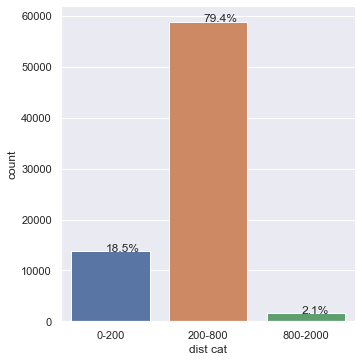

In [201]:
ax=sns.factorplot('dist cat',data=ticket,kind='count')
without_hue(ax, ticket['dist cat'])


80% des trajets sont de distance moyenne  et 2% des trajets sont supérieurs à 800 km. Ce qui est compréhensible car le type de transport proposées (voiture,train,bus) est idéal pour des trajets de moyennes distances alors que les trajets de longue distances sont plus adaptées à des voyages en avion ou bateau. 

## Analyse bidimensionnel:

#### prix et durée des trajets:

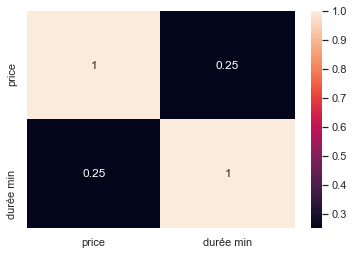

In [107]:
correlation_mat = ticket[['price','durée min']].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Les variable 'prix' et 'durée des trajet ' sont positivement mais peu corrélées ( corrélation 0.25) donc les variables ne s'influencent pas assez.

<AxesSubplot:xlabel='durée min', ylabel='price'>

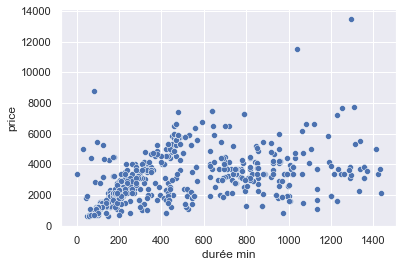

In [108]:
sns.scatterplot(data=ticket.iloc[0:1000],x='durée min',y='price')

#### prix vs type de transport et  distances:

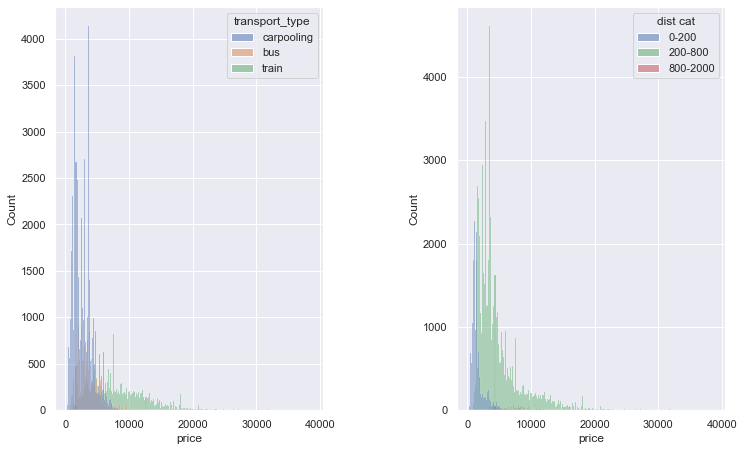

In [149]:
fig, ax =plt.subplots(1,2,figsize=(12,7))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.5,   # the amount of width reserved for blank space between subplots
hspace = 0.2 ,  # the amount of height reserved for white space between subplots
               )
my_pal = { '0-200':'b',  '200-800':'g', '800-2000':'r'}
sns.histplot(x='price',data=ticket,hue=ticket['transport_type'],ax=ax[0]) 
sns.histplot(x='price',data=ticket,hue=ticket['dist cat'],ax=ax[1],palette=my_pal) 
fig.show()


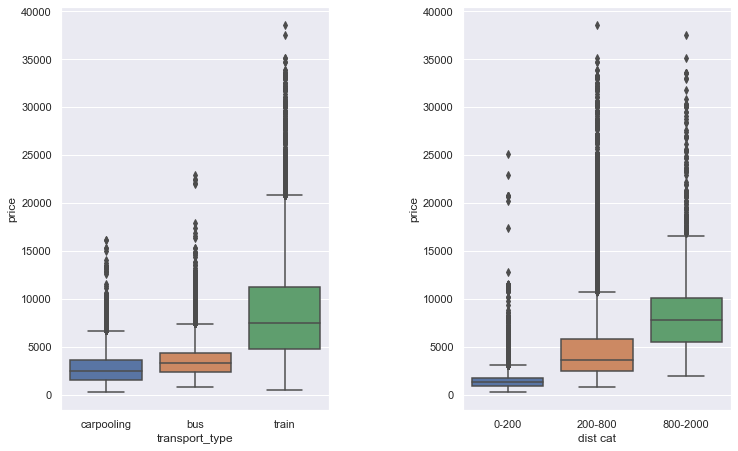

In [151]:
fig, ax=plt.subplots(1,2,figsize=(12,7))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.5,   # the amount of width reserved for blank space between subplots
hspace = 0.2 ,  # the amount of height reserved for white space between subplots
               )
box_plot=sns.boxplot(x=ticket['transport_type'],y=ticket['price'],ax=ax[0])
box_plot=sns.boxplot(x=ticket['dist cat'],y=ticket['price'],ax=ax[1])
fig.show()

- Le moyen de transport le plus chere est le train suivi du bus qui dépasse légerement le covoiturage mais possède des valeurs abérantes plus extrèmes (aux alentours de 22500).

- Plus la distance augmante plus les tarifs des trajets augmentent. On remarque aussi à aprtir des tailles des boxplot par catégorie que plus la distance augmente plus il y a de variance dans les données mais cela peut aussi être dû aux différences entre les taille des intervalles.


#### durée des trajets vs type de transport et les  distances:

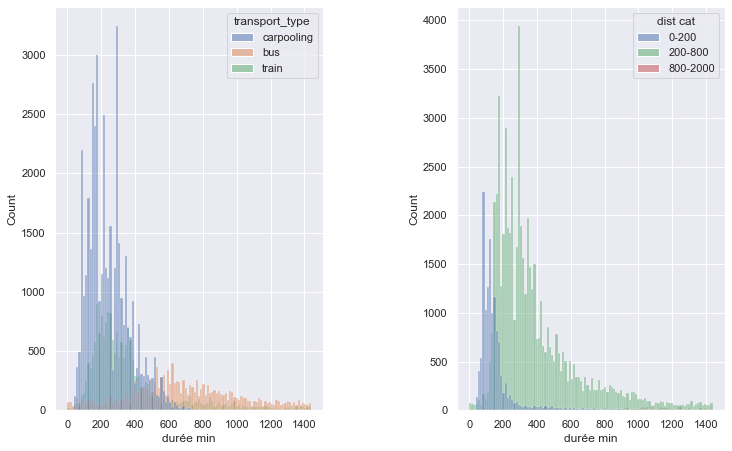

In [152]:
fig, ax =plt.subplots(1,2,figsize=(12,7))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.5,   # the amount of width reserved for blank space between subplots
hspace = 0.2 ,  # the amount of height reserved for white space between subplots
               )
my_pal = { '0-200':'b',  '200-800':'g', '800-2000':'r'}
sns.histplot(x='durée min',data=ticket,hue=ticket['transport_type'],ax=ax[0]) 
sns.histplot(x='durée min',data=ticket,hue=ticket['dist cat'],ax=ax[1],palette=my_pal) 
fig.show()

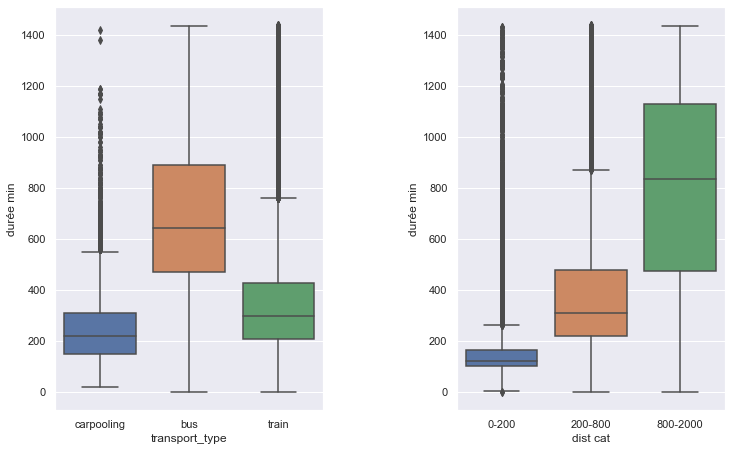

In [153]:
fig, ax=plt.subplots(1,2,figsize=(12,7))
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 0.9,   # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 0.9,      # the top of the subplots of the figure
wspace = 0.5,   # the amount of width reserved for blank space between subplots
hspace = 0.2 ,  # the amount of height reserved for white space between subplots
               )
box_plot=sns.boxplot(x=ticket['transport_type'],y=ticket['durée min'],ax=ax[0])
box_plot=sns.boxplot(x=ticket['dist cat'],y=ticket['durée min'],ax=ax[1])
fig.show()

- Les trajets en bus sont généralement de longue durée (75% des trajets sont supérieurs à 500 min).
- Moyennement Les trajets en train sont d'une durée d'environ 300 min proche de celles en covoiturage ( environ 225 min) mais il y a plus de variance (la moustache supérieur des voyages en train se rapproche de 800 min alors que celle en covoiturage est proche de 600 min)
- Logiquement plus la distance augmente plus la durée augmente. La largeur des boxplot dépend de la largeur des intervalles des distances. 

In [224]:
ticket['dist cat'].count()

74168

### type de transport vs les distances:

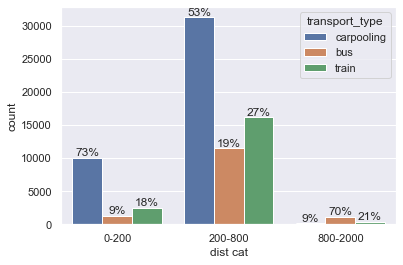

In [234]:
ax=sns.countplot(x='dist cat',data=ticket, hue= 'transport_type')
barPerc(ticket,'dist cat',ax)

- Les trajets de longues de distances (supérieur à 800) sont effectuées à 70% en bus et 21% en train et 9% en covoiturage.
- Le covoiturage est dominant  pour les  trajets de courtes distances (73%) et  moyennes distances (53%).
- Le train est un moyen de transport polyvalent, il est présent dans toutes les distances mais ne dominent dans aucunes d'entres elles.

# 3- Prédiction du prix:

Il faut transformer les donénes qualitatives en variables quantitaves avant la prédiction.

In [174]:
Dummies=pd.get_dummies(ticket[['transport_type','dist cat']])
tab=pd.concat([ticket[['durée min']],Dummies],axis=1)
tab.head()

,durée min,transport_type_bus,transport_type_carpooling,transport_type_train,dist cat_0-200,dist cat_200-800,dist cat_800-2000
0,370.0,0,1,0,0,1,0
1,1070.0,1,0,0,0,1,0
2,477.0,0,0,1,0,1,0
3,1295.0,0,0,1,0,1,0
4,1306.0,0,0,1,0,1,0


On divise les données en entrainement et test et on les scale à cause de la présence de valeurs abérantes qu'on a remarqué dans les boxplot.

In [178]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(tab,ticket['price'],test_size = 0.25, random_state = 12)

scaler = StandardScaler()  
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
# Meme transformation sur le test
X_test = scaler.transform(X_test)

### Régression linéaire:

In [179]:
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(X_train, Y_train)


# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.544088, Meilleur paramètre = {'alpha': 0.5}


In [268]:
# Prédiction sur l'échantillon test
pred=regLassOpt.predict(X_test)
print('affichage des 5 premiers résultats avec les valeurs testes:')
print('')
print( 'valeurs prédites:',np.around(pred[0:5]))
print( 'valeurs réelles: ',Y_test.values[0:5])
print('')
print('Score R2 de prédiction: ', r2_score(Y_test,pred))

affichage des 5 premiers résultats avec les valeurs testes:

valeurs prédites: [6074. 8330. 3198. 4270. 3085.]
valeurs réelles:  [4170 8200 2800 2400 2150]

Score R2 de prédiction:  0.5377529782297648


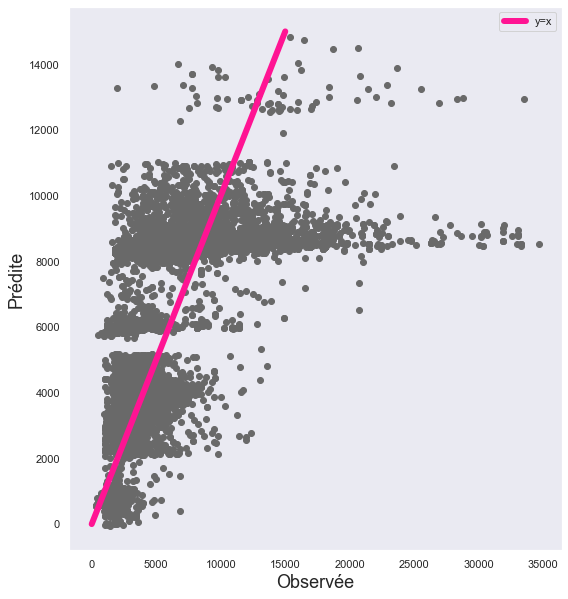

In [183]:
plt.figure(figsize=(30,10))
#plt.subplot(333)

#Valeurs prédites en fonction des valeurs observées
ax1 = plt.subplot(1,3,1)
x=np.linspace(-10,15000,35000)
plt.plot(Y_test,pred,"o", c="dimgrey")
plt.xlabel("Observée", fontsize=18)
plt.ylabel("Prédite", fontsize=18)
plt.plot(x,x, c='deeppink', linewidth=6, label= "y=x")
plt.legend()
plt.grid()

Le score R2 n'est pas assez élévé  53 ce qui montre Les résultats ne sont pas assez satisfaisants avec  la régression linéaire.

### LazyPredict:

la librairy Lazypredict permet d'appliquer rapidement 40 algorithmes de prévision. Ceci permet de premièrement avoir une idée sur les résultats des prédictions sur la base de données et de déterminer les algorithmes qui vont le mieux fonctionner et ensuite d'essayer de les améliorer.

In [184]:
import pyforest #importer 40 librairies connues de python
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.metrics import accuracy_score
import lazypredict
from lazypredict.Supervised import LazyRegressor

clf = LazyRegressor(predictions=True,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [05:53<00:00,  8.41s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.70,0.70,2047.44,2.64
BaggingRegressor,0.70,0.70,2053.26,0.29
ExtraTreesRegressor,0.70,0.70,2057.78,1.75
XGBRegressor,0.69,0.69,2059.88,0.68
DecisionTreeRegressor,0.69,0.69,2067.87,0.05
ExtraTreeRegressor,0.69,0.69,2072.96,0.04
LGBMRegressor,0.67,0.67,2150.51,0.25
KNeighborsRegressor,0.67,0.67,2153.85,2.89
HistGradientBoostingRegressor,0.65,0.66,2189.93,0.76


- On voit que les résultats sont fiables car on remarque que pour l'algorithme Lasso l'erreur est de 54 ce qui est très proche des résultats qu'on a obtenu. 

- L'algorithme qui convient le mieux est le Baggingregressor car il possède un score élévé et un temps d'execution très petit. Mais il faudrait aussi tester les autres algorithmes qui montrent de bons résultats car les résultas peuvent changer après l'optimisation des paramètres.